In [1]:
import pandas as pd

# Data extraction from MongoDB 

In [1]:
import pymongo
import pandas as pd
#initializing the client 
client = pymongo.MongoClient("mongodb://localhost:27017/")

#databases which have the posts 
database_names = ["anxiety_posts", "depression_posts", "mental_health_posts", "social_anxiety_posts"]

#list to store documents
all_documents = []

for db_name in database_names:
    db = client[db_name]
    for collection_name in db.list_collection_names():
        collection = db[collection_name]
        cursor = collection.find({})
        for document in cursor:
            document["subreddit"] = db_name
            all_documents.append({
                "created_utc": pd.to_datetime(document.get("created_utc"), unit='s'),
                "id": document.get("id"),
                "name": document.get("name"),
                "num_comments": document.get("num_comments"), #can remove this as it has 0 no use 
                "score": document.get("score"),
                "title": document.get("title"),
                "selftext": document.get("selftext"),
                "author": document.get("author"),
                "subreddit": db_name  
            })

#converting list of dicts into a df
healthcare_df = pd.DataFrame(all_documents)
#shape 
print("Shape of the DataFrame:", healthcare_df.shape)


Shape of the DataFrame: (156174, 9)


In [2]:
healthcare_df=pd.read_csv('healthcare_data_09_2023_02_2024.csv',index_col=0)

In [3]:
# top 5 records
healthcare_df.head()

created_utc       id        name  num_comments  score  \
0  2023-09-01 00:04:31  166rkdi  t3_166rkdi             0      1   
1  2023-09-01 00:17:08  166rvd1  t3_166rvd1             0      1   
2  2023-09-01 00:17:22  166rvjv  t3_166rvjv             0      2   
3  2023-09-01 00:18:16  166rw9y  t3_166rw9y             0      1   
4  2023-09-01 00:19:46  166rxgk  t3_166rxgk             0      1   

                                               title  \
0  Is it possible for anxiety to become so habitu...   
1                                       Cannot sleep   
2               I just had my first mental breakdown   
3                Is a fluctuating Heart Rate normal?   
4          Can anxiety make someone starve to death?   

                                            selftext                author  \
0  Can the anxiety become a permanent locked stat...           Sea-Buy4667   
1  so my anxiety has been so bad for the past few...  Unfair_Effective_634   
2  I’ve walked this earth 31 years and have alway...           SeoulKitten   
3  My Apple Watch shows constant changing of hear...                addl99   
4  When I have really bad anxiety I can't eat. Ca...          eastsideeric   

       subreddit  month  day  year  
0  anxiety_posts      9    1  2023  
1  anxiety_posts      9    1  2023  
2  anxiety_posts      9    1  2023  
3  anxiety_posts      9    1  2023  
4  anxiety_posts      9    1  2023

In [4]:
#sample 10 records
healthcare_df.sample(10)

created_utc       id        name  num_comments  score  \
49829   2023-09-17 15:29:49  16l3lvo  t3_16l3lvo             0      2   
102945  2023-12-27 15:43:26  18s3kmo  t3_18s3kmo             6      3   
4866    2023-09-26 00:57:48  16s9j5u  t3_16s9j5u             0      1   
62962   2024-01-02 20:22:08  18wz8jp  t3_18wz8jp             0      1   
148509  2024-01-24 16:41:11  19eldh6  t3_19eldh6             0      1   
155083  2023-11-15 21:27:35  17w4auv  t3_17w4auv             0      5   
78872   2023-11-14 21:32:05  17vcuai  t3_17vcuai             0      1   
62344   2024-01-01 10:15:48  18vtxgt  t3_18vtxgt             0      1   
30032   2023-10-10 12:03:14  174jgm5  t3_174jgm5             0      1   
36232   2023-10-06 04:40:48  1713cnv  t3_1713cnv             0      1   

                                                    title  \
49829             Sometimes I feel like there's no point.   
102945  How do you ask for help when help was always g...   
4866                                 why hasn’t he texted   
62962                                            daybrake   
148509                             Social Anxiety Is Gone   
155083  Froze up in college presentation today. Any ad...   
78872                                   When will it end?   
62344                                  Ed ruining my life   
30032   mild droopy face from lymph nodes? anxious, ad...   
36232   I lost almost 10 pounds in a month due to depr...   

                                                 selftext  \
49829   Sometimes I ask why I'm still alive. Like I ju...   
102945  I asked myself this morning this question,. I ...   
4866                                            [removed]   
62962                                           [removed]   
148509  I had some bad social anxiety but I had a reve...   
155083  I’ve never considered myself a good public spe...   
78872   I'm 19 years old and a male. For the most part...   
62344   Developed one last year just before that i was...   
30032   i have a common cold and it’s activating my ly...   
36232   My depression has taken over again. Just a mon...   

                     author             subreddit  month  day  year  
49829         PleasantSink1      depression_posts      9   17  2023  
102945       therandinator2   mental_health_posts     12   27  2023  
4866              [deleted]         anxiety_posts      9   26  2023  
62962   Strong_Working_1944      depression_posts      1    2  2024  
148509              GoldK06  social_anxiety_posts      1   24  2024  
155083      Which_Poet_9750  social_anxiety_posts     11   15  2023  
78872         Swiftie121389      depression_posts     11   14  2023  
62344      Academic_Ad_6626      depression_posts      1    1  2024  
30032        Ok-Special-912         anxiety_posts     10   10  2023  
36232                 axl6y      depression_posts     10    6  2023

In [5]:
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156174 entries, 0 to 156173
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   created_utc   156174 non-null  object
 1   id            156174 non-null  object
 2   name          156174 non-null  object
 3   num_comments  156174 non-null  int64 
 4   score         156174 non-null  int64 
 5   title         156174 non-null  object
 6   selftext      155125 non-null  object
 7   author        156174 non-null  object
 8   subreddit     156174 non-null  object
 9   month         156174 non-null  int64 
 10  day           156174 non-null  int64 
 11  year          156174 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 15.5+ MB


In [6]:
#month, day, and year separately
healthcare_df['month'] = healthcare_df['created_utc'].dt.month
healthcare_df['day'] = healthcare_df['created_utc'].dt.day
healthcare_df['year'] = healthcare_df['created_utc'].dt.year
healthcare_df.head()

created_utc       id        name  num_comments  score  \
0 2023-09-01 00:04:31  166rkdi  t3_166rkdi             0      1   
1 2023-09-01 00:17:08  166rvd1  t3_166rvd1             0      1   
2 2023-09-01 00:17:22  166rvjv  t3_166rvjv             0      2   
3 2023-09-01 00:18:16  166rw9y  t3_166rw9y             0      1   
4 2023-09-01 00:19:46  166rxgk  t3_166rxgk             0      1   

                                               title  \
0  Is it possible for anxiety to become so habitu...   
1                                       Cannot sleep   
2               I just had my first mental breakdown   
3                Is a fluctuating Heart Rate normal?   
4          Can anxiety make someone starve to death?   

                                            selftext                author  \
0  Can the anxiety become a permanent locked stat...           Sea-Buy4667   
1  so my anxiety has been so bad for the past few...  Unfair_Effective_634   
2  I’ve walked this earth 31 years and have alway...           SeoulKitten   
3  My Apple Watch shows constant changing of hear...                addl99   
4  When I have really bad anxiety I can't eat. Ca...          eastsideeric   

       subreddit  month  day  year  
0  anxiety_posts      9    1  2023  
1  anxiety_posts      9    1  2023  
2  anxiety_posts      9    1  2023  
3  anxiety_posts      9    1  2023  
4  anxiety_posts      9    1  2023

In [20]:
# saved the file extracted from mongodb 

# healthcare_df.to_csv(r'D:\606_Capstone_Project\Healthcare\healthcare_data_09_2023_02_2024.csv')

In [4]:
# bar graph of posts per month per each year. 
#- from each subreddit. 
#- combinedly from diff subreddits. 

In [6]:
healthcare_df.groupby(by=['month','year'])['id'].count().reset_index().rename(columns={'id': 'count'})

month  year  count
0      1  2024  30663
1      2  2024  16897
2      9  2023  25634
3     10  2023  27332
4     11  2023  27164
5     12  2023  28484

In [7]:
result=healthcare_df.groupby(by=['month','year','subreddit'])['id'].count().reset_index().rename(columns={'id': 'count'})

In [8]:
result

month  year             subreddit  count
0       1  2024         anxiety_posts   6761
1       1  2024      depression_posts  11700
2       1  2024   mental_health_posts   9895
3       1  2024  social_anxiety_posts   2307
4       2  2024         anxiety_posts   2936
5       2  2024      depression_posts   8153
6       2  2024   mental_health_posts   4761
7       2  2024  social_anxiety_posts   1047
8       9  2023         anxiety_posts   5735
9       9  2023      depression_posts   9791
10      9  2023   mental_health_posts   7603
11      9  2023  social_anxiety_posts   2505
12     10  2023         anxiety_posts   6407
13     10  2023      depression_posts   9815
14     10  2023   mental_health_posts   8612
15     10  2023  social_anxiety_posts   2498
16     11  2023         anxiety_posts   6060
17     11  2023      depression_posts  10266
18     11  2023   mental_health_posts   8753
19     11  2023  social_anxiety_posts   2085
20     12  2023         anxiety_posts   6504
21     12  2023      depression_posts  10815
22     12  2023   mental_health_posts   9147
23     12  2023  social_anxiety_posts   2018

##### change the bar graphs by giving deatiling and re-arrange them in order of 9,10,11,12,1,2

In [9]:
import plotly.express as px
fig = px.bar(result, x='month', y='count', color='subreddit', barmode='group', labels={'count': 'Count'})
fig.update_layout(title='Post Counts by Month and Subreddit', xaxis_title='Month', yaxis_title='Count')
fig.show()

In [10]:
result1=healthcare_df.groupby(by=['subreddit'])['id'].count().reset_index().rename(columns={'id': 'count'})
result1

subreddit  count
0         anxiety_posts  34403
1      depression_posts  60540
2   mental_health_posts  48771
3  social_anxiety_posts  12460

In [11]:
fig = px.bar(result1, x='subreddit', y='count', color='subreddit', barmode='group', labels={'count': 'Count'})
fig.update_layout(title='Post Counts and Subreddit', xaxis_title='Month', yaxis_title='Count')
fig.show()

## Data cleaning and pre-processing

- check the title and selftext columns if there are empty strings/removed/deleted posts. 
- add a column to check the length of the title and self text (short self texts will be checked and if not necessary will remove)
- check the avg length of post from depression subreddit, anxiety subreddit (to know the pattern if there is any by observing the avg length of post by the users from those grps) 
- build a word cloud fr each separate subreddit, and do it combinedly as well 
- n-grams, word freqeuncy checks

#### check the text and selftext columns if there are empty strings/removed/deleted posts

In [12]:
# for title

patterns = {
    'empty': r'^\s*$', # for empty string 
    'removed': r'removed', # for posts contains removed
    'deleted': r'deleted' # for posts contains deleted
}

counts = {key: 0 for key in patterns}

for key, pattern in patterns.items():
    counts[key] = healthcare_df['title'].str.contains(pattern, regex=True).sum()

print("Counts of title:")
for key, value in counts.items():
    print(f"{key}: {value}")

Counts of title:
empty: 0
removed: 26
deleted: 29


In [13]:
patterns = {
    'empty': r'^\s*$',
    'removed': r'removed',
    'deleted': r'deleted'
}

counts = {key: 0 for key in patterns}

for key, pattern in patterns.items():
    counts[key] = healthcare_df['selftext'].str.contains(pattern, regex=True).sum()

print("Counts of selftext:")
for key, value in counts.items():
    print(f"{key}: {value}")

Counts of selftext:
empty: 0
removed: 34844
deleted: 876


In [14]:
healthcare_df[healthcare_df['selftext']=='[removed]']['author'].value_counts()

author
[deleted]               500
jgisaac1982              42
SuchSmoke4082            40
suicidalratprinxcess     30
anechointhedark          20
                       ... 
Penetal                   1
GlowPrincess33            1
tanasinn989               1
GouhinsFleshlight         1
analickexib               1
Name: count, Length: 27039, dtype: int64

In [15]:
healthcare_df[healthcare_df['author']=='jgisaac1982']

created_utc       id        name  num_comments  score  \
4886   2023-09-26 02:50:25  16sbzhm  t3_16sbzhm             0      1   
5344   2023-09-28 02:40:48  16u47w0  t3_16u47w0             0      1   
5552   2023-09-29 04:43:21  16v26xn  t3_16v26xn             0      1   
9024   2023-11-03 04:19:18  17mmsvp  t3_17mmsvp             0      1   
9798   2023-11-07 04:24:30  17pm9dp  t3_17pm9dp             0      1   
10014  2023-11-08 04:40:31  17qdzr4  t3_17qdzr4             0      1   
10249  2023-11-09 04:36:49  17r54l0  t3_17r54l0             0      1   
10431  2023-11-10 02:47:32  17rua85  t3_17rua85             0      1   
10639  2023-11-11 04:31:29  17smupa  t3_17smupa             0      1   
11003  2023-11-13 04:45:59  17u34h6  t3_17u34h6             0      1   
11242  2023-11-14 08:11:01  17uxmwv  t3_17uxmwv             0      1   
11467  2023-11-15 04:26:48  17vlkx3  t3_17vlkx3             0      1   
11713  2023-11-16 02:42:05  17wbtn3  t3_17wbtn3             0      1   
11981  2023-11-17 04:32:54  17x70uv  t3_17x70uv             0      1   
12204  2023-11-18 04:27:22  17xydcq  t3_17xydcq             0      1   
12845  2023-11-21 04:36:35  1808o85  t3_1808o85             0      1   
13020  2023-11-22 02:39:40  180yr6u  t3_180yr6u             0      1   
13470  2023-11-24 02:38:47  182hkag  t3_182hkag             0      1   
14070  2023-11-27 04:20:06  184uce2  t3_184uce2             0      1   
14339  2023-11-28 04:36:52  185np5f  t3_185np5f             0      1   
21638  2023-12-02 04:47:28  188vwe1  t3_188vwe1             0      1   
22039  2023-12-04 04:34:36  18acdvr  t3_18acdvr             0      1   
22236  2023-12-05 04:25:56  18b3os6  t3_18b3os6             0      1   
22460  2023-12-06 04:24:25  18bvqsk  t3_18bvqsk             0      1   
22689  2023-12-07 05:55:05  18cox7k  t3_18cox7k             0      1   
23109  2023-12-09 05:13:00  18e66l4  t3_18e66l4             0      1   
23542  2023-12-11 04:49:56  18fmld5  t3_18fmld5             0      1   
24283  2023-12-14 04:50:36  18i0rw4  t3_18i0rw4             0      1   
24506  2023-12-15 04:24:34  18iromy  t3_18iromy             0      1   
28144  2023-10-02 04:46:58  16xnfjr  t3_16xnfjr             0      1   
28633  2023-10-04 04:57:45  16ze6to  t3_16ze6to             0      1   
29080  2023-10-06 02:44:31  17114li  t3_17114li             0      1   
29728  2023-10-09 02:45:38  173h7x2  t3_173h7x2             0      1   
29981  2023-10-10 05:11:06  174d727  t3_174d727             0      1   
30678  2023-10-13 04:40:54  176qlnt  t3_176qlnt             0      1   
31263  2023-10-16 02:43:33  178vxrh  t3_178vxrh             0      1   
31736  2023-10-18 04:49:53  17aigm0  t3_17aigm0             0      1   
32188  2023-10-20 04:40:43  17c2xva  t3_17c2xva             0      1   
32761  2023-10-23 02:45:43  17eabgw  t3_17eabgw             0      1   
32983  2023-10-24 05:16:36  17f57wk  t3_17f57wk             0      1   
33427  2023-10-26 02:43:42  17gmhb6  t3_17gmhb6             0      1   
33646  2023-10-27 04:39:09  17hfn24  t3_17hfn24             0      1   

                                                   title   selftext  \
4886   Unlocking Independence Wealth Breakthrough #mo...  [removed]   
5344   Mastering Emotions for Success #motivation # #...  [removed]   
5552   Wealth Deceptive Lure The Void Within #motivat...  [removed]   
9024   #shorts #short #shortvideo "The Money Happines...  [removed]   
9798   #short #shorts #shortvideo "Overcoming Pessimi...  [removed]   
10014  #shorts #short #shortvideo "The Cost of False ...  [removed]   
10249  #shorts #short #shortvideo "Success, Wealth, P...  [removed]   
10431  #shorts #shorts #shortvideo "Dreams Unleashed ...  [removed]   
10639  #short #shorts #shortvideo God's Lessons Grati...  [removed]   
11003  #shorts #shorts #shortvideo Embrace Tomorrow's...  [removed]   
11242  #shorts #short #shortvideo Purpose Love, Unity...  [removed]   
11467  #shorts #short #shortvideo Defining Masculinit...  [removed

In [16]:
healthcare_df[healthcare_df['author']=='[deleted]']

created_utc       id        name  num_comments  score  \
4479    2023-09-24 11:25:00  16qvco9  t3_16qvco9             0      1   
4517    2023-09-24 16:25:09  16r1vkz  t3_16r1vkz             0      1   
4664    2023-09-25 04:40:04  16rilk3  t3_16rilk3             0      1   
4866    2023-09-26 00:57:48  16s9j5u  t3_16s9j5u             0      1   
6368    2024-02-04 08:17:02  1aij19v  t3_1aij19v             0      1   
...                     ...      ...         ...           ...    ...   
155546  2023-11-21 14:14:50  180hxy4  t3_180hxy4             0      1   
155810  2023-11-25 10:21:14  183gubi  t3_183gubi             1      1   
155814  2023-11-25 11:14:16  183hlj3  t3_183hlj3             0      1   
155839  2023-11-25 20:09:36  183sb9d  t3_183sb9d             0      1   
155954  2023-11-27 17:05:08  1857sp9  t3_1857sp9             0      1   

                                                    title   selftext  \
4479                       Anxiety, give me advice please  [deleted]   
4517     Worried about being accused of sexual harassment  [removed]   
4664       Guided Meditation For Anxiety - Anxiety Relief  [deleted]   
4866                                 why hasn’t he texted  [removed]   
6368    Is there a chance this person could be faking ...  [deleted]   
...                                                   ...        ...   
155546                           my life is falling apart  [deleted]   
155810                  My exoerience with social anxiety  [removed]   
155814      How do I overcome fear of approaching people?  [deleted]   
155839                        Going out is a sport for me  [deleted]   
155954            Ate lunch in the school cafeteria today  [deleted]   

           author             subreddit  month  day  year  
4479    [deleted]         anxiety_posts      9   24  2023  
4517    [deleted]         anxiety_posts      9   24  2023  
4664    [deleted]         anxiety_posts      9   25  2023  
4866    [deleted]         anxiety_posts      9   26  2023  
6368    [deleted]         anxiety_posts      2    4  2024  
...           ...                   ...    ...  ...   ...  
155546  [deleted]  social_anxiety_posts     11   21  2023  
155810  [deleted]  social_anxiety_posts     11   25  2023  
155814  [deleted]  social_anxiety_posts     11   25  2023  
155839  [deleted]  social_anxiety_posts     11   25  2023  
155954  [deleted]  social_anxiety_posts     11   27  2023  

[990 rows x 12 columns]

- drop the rows which have [removed],[deleted] from selftext 
- drop teh rows which have deleted, removed in both selftext and author columns. 
- check the score and remove the rows which have only 1 where the selftext is removed or deleted

In [ ]:
# dropping the rows which have empty string, deleted and removed 
# self text removed and author deleted condition

In [18]:
healthcare_df.shape

(156174, 12)

In [17]:
temp = healthcare_df[(healthcare_df['selftext'] != '') & (healthcare_df['selftext'] != '[removed]') & (healthcare_df['selftext'] != '[deleted]')]
temp.shape



(121260, 12)

In [25]:
# Drop rows with 'deleted' in the 'author' column
temp= temp[temp['author'] != '[deleted]']
temp.shape

(121254, 12)

In [26]:
temp.isna().sum()

created_utc        0
id                 0
name               0
num_comments       0
score              0
title              0
selftext        1047
author             0
subreddit          0
month              0
day                0
year               0
dtype: int64

In [28]:
#check the na rows. 
temp[temp.isna().any(axis=1)]

created_utc       id        name  num_comments  score  \
6       2023-09-01 00:30:43  166s71v  t3_166s71v             0      1   
25      2023-09-01 02:21:56  166unk5  t3_166unk5             0      1   
28      2023-09-01 02:48:12  166v71u  t3_166v71u             0     19   
33      2023-09-01 03:02:08  166vhi0  t3_166vhi0             0      2   
69      2023-09-01 07:58:27  1670ugk  t3_1670ugk             0      3   
...                     ...      ...         ...           ...    ...   
143037  2023-09-25 23:02:31  16s6xp2  t3_16s6xp2             0      0   
143111  2023-09-27 22:04:48  16txmci  t3_16txmci             0      0   
143132  2023-09-28 00:13:54  16u0uul  t3_16u0uul             0      1   
143188  2023-09-28 04:24:03  16u68te  t3_16u68te             0      1   
143299  2023-09-28 15:39:41  16ujbs5  t3_16ujbs5             0      1   

                                                    title selftext  \
6       Anybody have anxiety as a result of discontinu...      NaN   
25      What helps you in constant dizziness 24×7 plzz...      NaN   
28      What do you tell yourself to calm down when ha...      NaN   
33                                  I feel sad and empty.      NaN   
69      I recently became mindful of stumbling on my w...      NaN   
...                                                   ...      ...   
143037  Somebody please help me - Toxic Family - Think...      NaN   
143111              TW: CSA. I can’t seem to shake it off      NaN   
143132                                      Panic attacks      NaN   
143188                         screaming voice in my head      NaN   
143299  Teenagers, what’s something that concerns/trou...      NaN   

                      author            subreddit  month  day  year  
6               januarysbaby        anxiety_posts      9    1  2023  
25      Total-Application866        anxiety_posts      9    1  2023  
28       Ikeepmyselfhydrated        anxiety_posts      9    1  2023  
33             xxJeff21Godxx        anxiety_posts      9    1  2023  
69               PyroMan7337        anxiety_posts      9    1  2023  
...                      ...                  ...    ...  ...   ...  
143037                xxyyyt  mental_health_posts      9   25  2023  
143111      Ok-Language-6048  mental_health_posts      9   27  2023  
143132             Lilly2443  mental_health_posts      9   28  2023  
143188  SpeakerBeautiful6844  mental_health_posts      9   28  2023  
143299             JohnOdd50  mental_health_posts      9   28  2023  

[1047 rows x 12 columns]

In [38]:
temp[(temp['selftext'].isna()) & (temp['score']>2)]

created_utc       id        name  num_comments  score  \
28      2023-09-01 02:48:12  166v71u  t3_166v71u             0     19   
69      2023-09-01 07:58:27  1670ugk  t3_1670ugk             0      3   
223     2023-09-04 12:22:21  169ql1n  t3_169ql1n             0      5   
387     2023-09-05 03:22:18  16acv4n  t3_16acv4n             0     21   
454     2023-09-05 15:22:03  16ar44p  t3_16ar44p             0      3   
...                     ...      ...         ...           ...    ...   
34184   2023-10-29 23:31:09  17jfrs2  t3_17jfrs2             0      3   
129079  2023-10-06 15:20:50  171f3o0  t3_171f3o0             0      3   
130718  2023-10-12 04:05:15  175xuym  t3_175xuym             0      8   
132865  2023-10-19 09:28:08  17bf3a7  t3_17bf3a7             0      3   
142287  2023-09-23 09:54:08  16q0frn  t3_16q0frn             0      3   

                                                    title selftext  \
28      What do you tell yourself to calm down when ha...      NaN   
69      I recently became mindful of stumbling on my w...      NaN   
223     How long it takes till your fatigue caused by ...      NaN   
387     How to calm down brain for sleep? I need some ...      NaN   
454     How to deal with intrusive bad thoughts that s...      NaN   
...                                                   ...      ...   
34184   Constantly afraid to lose my job even tho I’ve...      NaN   
129079  Anyone else feels life is meaningless again an...      NaN   
130718                          Does anyone else hate CBT      NaN   
132865  The love of my life took her own life in front...      NaN   
142287                 Have you suffered burnout? I have.      NaN   

                     author            subreddit  month  day  year  
28      Ikeepmyselfhydrated        anxiety_posts      9    1  2023  
69              PyroMan7337        anxiety_posts      9    1  2023  
223      isitbecauseimugly_        anxiety_posts      9    4  2023  
387      Legitimate_Sea5808        anxiety_posts      9    5  2023  
454      Timely_Release4202        anxiety_posts      9    5  2023  
...                     ...                  ...    ...  ...   ...  
34184   Worried_Pepper_1049        anxiety_posts     10   29  2023  
129079            canAdumbs  mental_health_posts     10    6  2023  
130718     CrumbsThatWasAce  mental_health_posts     10   12  2023  
132865              Zyphyll  mental_health_posts     10   19  2023  
142287               hilldi  mental_health_posts      9   23  2023  

[172 rows x 12 columns]

In [36]:
121254-717

120537

In [31]:
temp.iloc[6,:]['title']

'Anybody have anxiety as a result of discontinuing a psych med?'

In [39]:
r= temp.loc[(temp['score'] > 2) | ~temp['selftext'].isna()]
r.shape

(120379, 12)

In [40]:
r.isna().sum() # so these 172 are the title values which have score greater than 2 (which means there is smnthg in these)

created_utc       0
id                0
name              0
num_comments      0
score             0
title             0
selftext        172
author            0
subreddit         0
month             0
day               0
year              0
dtype: int64

In [43]:
#final dataframe is "r"
r.sample(8)

created_utc       id        name  num_comments  score  \
155970  2023-11-27 20:29:38  185csek  t3_185csek             0     52   
102508  2023-12-26 01:34:36  18qwevu  t3_18qwevu             0      1   
123579  2023-11-16 05:33:34  17wf780  t3_17wf780             0      2   
79728   2023-11-16 22:28:51  17wzf4t  t3_17wzf4t             0      3   
18237   2024-01-16 03:43:14  197t1iq  t3_197t1iq             0      2   
48615   2023-09-13 22:54:57  16i1mdz  t3_16i1mdz             0      2   
10409   2023-11-10 00:26:14  17rrgz2  t3_17rrgz2             0      1   
89888   2023-12-16 09:46:19  18jnwti  t3_18jnwti             0      1   

                                                    title  \
155970  It's so hard to enjoy life when you have socia...   
102508                                  Domestic Violence   
123579                     agoraphobia or social anxiety?   
79728      there's no reason for me to continue living...   
18237                      Psychosomatic symptoms sucks 😞   
48615                              I don't know anymore..   
10409   Vision still extremely blurry after panic atta...   
89888                                I'm tired of my life   

                                                 selftext  \
155970  Even though my social anxiety is not as limiti...   
102508  I’m a female teen, who wants help as I feel th...   
123579  for starters im 18. ive always had issues with...   
79728   There's really no reason to continue, I feel p...   
18237   Hey everyone I had to go to the er cause I saw...   
48615   So...I don't know if I'm posting this here cor...   
10409   Like my vision is already shit and I've got my...   
89888   I don't have the strength, I get tired, someti...   

                      author             subreddit  month  day  year  
155970          sweetgesture  social_anxiety_posts     11   27  2023  
102508         Boobie_Slayer   mental_health_posts     12   26  2023  
123579        scarythoughts_   mental_health_posts     11   16  2023  
79728         stoneswordlord      depression_posts     11   16  2023  
18237     Spiritual-Phase-33         anxiety_posts      1   16  2024  
48615   Queasy-Relation-1319      depression_posts      9   13  2023  
10409         Sudden_Pea4087         anxiety_posts     11   10  2023  
89888            demonpolsza      depression_posts     12   16  2023

In [44]:
#check the score like how many posts are having a score of 1. analyse if we need them ? 

### Analyse these 
- score less than 2 and score more than or equal to 2 - analyse separately. 
- combine them later and analyse. 
- do we require the less than 2 posts? are they valuable, do they have any hidden pattern which can be analysed?

##### score_less_than_2

In [46]:
score_less_than_2=r[r['score']<2]
score_less_than_2

created_utc       id        name  num_comments  score  \
0       2023-09-01 00:04:31  166rkdi  t3_166rkdi             0      1   
1       2023-09-01 00:17:08  166rvd1  t3_166rvd1             0      1   
3       2023-09-01 00:18:16  166rw9y  t3_166rw9y             0      1   
4       2023-09-01 00:19:46  166rxgk  t3_166rxgk             0      1   
7       2023-09-01 00:35:42  166sbdq  t3_166sbdq             0      1   
...                     ...      ...         ...           ...    ...   
156150  2023-11-29 18:47:34  186wvuk  t3_186wvuk             0      1   
156151  2023-11-29 18:52:46  186x098  t3_186x098             0      1   
156157  2023-11-29 20:19:36  186yzh4  t3_186yzh4             0      1   
156160  2023-11-29 20:26:11  186z4z3  t3_186z4z3             0      1   
156169  2023-11-29 23:12:38  18731hn  t3_18731hn             0      1   

                                                    title  \
0       Is it possible for anxiety to become so habitu...   
1                                            Cannot sleep   
3                     Is a fluctuating Heart Rate normal?   
4               Can anxiety make someone starve to death?   
7          Question about Propranolol and chest tightness   
...                                                   ...   
156150       Talking to Professor always makes me anxious   
156151  My therapist constantly keeps changing and i d...   
156157                      i feel completely incompetent   
156160                    Really Need Help For My Brother   
156169         Dealing with my anxiety in my relationship   

                                                 selftext  \
0       Can the anxiety become a permanent locked stat...   
1       so my anxiety has been so bad for the past few...   
3       My Apple Watch shows constant changing of hear...   
4       When I have really bad anxiety I can't eat. Ca...   
7       I’m going to start propranolol tomorrow and I ...   
...                                                   ...   
156150  Today I answered a question in class and came ...   
156151  Firstly, I have extreme level of social anxiet...   
156157  i feel like all i do is make fake promises. i ...   
156160  Hey guys,\n\nTotally new here, 35M and I reall...   
156169  So I’m 22 M and I’m currently in a relationshi...   

                      author             subreddit  month  day  year  
0                Sea-Buy4667         anxiety_posts      9    1  2023  
1       Unfair_Effective_634         anxiety_posts      9    1  2023  
3                     addl99         anxiety_posts      9    1  2023  
4               eastsideeric         anxiety_posts      9    1  2023  
7             heinousanus666         anxiety_posts      9    1  2023  
...                      ...                   ...    ...  ...   ...  
156150  Imaginary-Capital502  social_anxiety_posts     11   29  2023  
156151    infinityfrequences  social_anxiety_posts     11   29  2023  
156157      A_koalanamedfred  social_anxiety_posts     11   29  2023  
156160           supergox123  social_anxiety_posts     11   29  2023  
156169           methods_eye  social_anxiety_posts     11   29  2023  

[56822 rows x 12 columns]

In [48]:
result2=score_less_than_2.groupby(by=['subreddit'])['id'].count().reset_index().rename(columns={'id': 'count'})
result2


subreddit  count
0         anxiety_posts  18901
1      depression_posts  18212
2   mental_health_posts  16469
3  social_anxiety_posts   3240

In [55]:
fig = px.bar(result2, x='subreddit', y='count', color='subreddit', barmode='group', labels={'count': 'Count'})
fig.update_layout(title='Post Counts and Subreddit', xaxis_title='Subreddit', yaxis_title='Count')
fig.show()

#### score_more_than_2

In [51]:
score_more_than_2=r[r['score']>=2]
score_more_than_2

created_utc       id        name  num_comments  score  \
2       2023-09-01 00:17:22  166rvjv  t3_166rvjv             0      2   
5       2023-09-01 00:23:41  166s0v2  t3_166s0v2             0      5   
12      2023-09-01 01:03:41  166syfu  t3_166syfu             0      2   
13      2023-09-01 01:07:34  166t1qu  t3_166t1qu             0      3   
14      2023-09-01 01:29:30  166tiye  t3_166tiye             0      6   
...                     ...      ...         ...           ...    ...   
156168  2023-11-29 23:07:12  1872wva  t3_1872wva             0     15   
156170  2023-11-29 23:19:23  1873764  t3_1873764             0    103   
156171  2023-11-29 23:28:56  1873fbi  t3_1873fbi             0      2   
156172  2023-11-29 23:34:35  1873k50  t3_1873k50             0     72   
156173  2023-11-29 23:42:35  1873qkv  t3_1873qkv             0      2   

                                                    title  \
2                    I just had my first mental breakdown   
5       Can't even tell what's normal anymore because ...   
12                               Im terrified of adulting   
13                      Red bull and vodka anxiety attack   
14      I had to tell the girl I really like that I'm ...   
...                                                   ...   
156168                     So awkward around my coworkers   
156170      I beat social anxiety exactly a year ago, AMA   
156171                             I always regret trying   
156172  Do people act differently towards you than the...   
156173  Does anyone else take anti anxiety meds for ev...   

                                                 selftext  \
2       I’ve walked this earth 31 years and have alway...   
5       Woke up feeling out of breath. Not sure if it'...   
12      I’m so overwhelmed and anxious I’m barely slee...   
13      So I'll start out by saying I realize it is st...   
14      This very beautiful girl worked with me at a h...   
...                                                   ...   
156168  I started this new job last week and I'm so aw...   
156170  I wanna spread my knowledge and my ways of bea...   
156171  I have really really bad social anxiety that h...   
156172  People seem to be more energetic with other pe...   
156173  I’ve got an event coming up in a few days it’s...   

                      author             subreddit  month  day  year  
2                SeoulKitten         anxiety_posts      9    1  2023  
5              fuckerofmoths         anxiety_posts      9    1  2023  
12           Severe-Tie-4918         anxiety_posts      9    1  2023  
13              Catlover5566         anxiety_posts      9    1  2023  
14             Ronaldinho910         anxiety_posts      9    1  2023  
...                      ...                   ...    ...  ...   ...  
156168  Flashy-Appearance988  social_anxiety_posts     11   29  2023  
156170     PussyDestroyer694  social_anxiety_posts     11   29  2023  
156171   Practical_Step_3930  social_anxiety_posts     11   29  2023  
156172   No_Contribution2112  social_anxiety_posts     11   29  2023  
156173            nokiachick  social_anxiety_posts     11   29  2023  

[63557 rows x 12 columns]

In [52]:
result3=score_more_than_2.groupby(by=['subreddit'])['id'].count().reset_index().rename(columns={'id': 'count'})
result3

subreddit  count
0         anxiety_posts  13334
1      depression_posts  25032
2   mental_health_posts  16726
3  social_anxiety_posts   8465

In [54]:
fig = px.bar(result3, x='subreddit', y='count', color='subreddit', barmode='group', labels={'count': 'Count'})
fig.update_layout(title='Post Counts and Subreddit', xaxis_title='Subreddit', yaxis_title='Count')
fig.show()

## score_more_than_2 analysis

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
#dropping number of comments column as its of no use.
score_more_than_2.drop(columns="num_comments",inplace=True)

C:\Users\sssri\AppData\Local\Temp\ipykernel_6100\3657907202.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
score_more_than_2.head()

created_utc       id        name  score  \
2   2023-09-01 00:17:22  166rvjv  t3_166rvjv      2   
5   2023-09-01 00:23:41  166s0v2  t3_166s0v2      5   
12  2023-09-01 01:03:41  166syfu  t3_166syfu      2   
13  2023-09-01 01:07:34  166t1qu  t3_166t1qu      3   
14  2023-09-01 01:29:30  166tiye  t3_166tiye      6   

                                                title  \
2                I just had my first mental breakdown   
5   Can't even tell what's normal anymore because ...   
12                           Im terrified of adulting   
13                  Red bull and vodka anxiety attack   
14  I had to tell the girl I really like that I'm ...   

                                             selftext           author  \
2   I’ve walked this earth 31 years and have alway...      SeoulKitten   
5   Woke up feeling out of breath. Not sure if it'...    fuckerofmoths   
12  I’m so overwhelmed and anxious I’m barely slee...  Severe-Tie-4918   
13  So I'll start out by saying I realize it is st...     Catlover5566   
14  This very beautiful girl worked with me at a h...    Ronaldinho910   

        subreddit  month  day  year  
2   anxiety_posts      9    1  2023  
5   anxiety_posts      9    1  2023  
12  anxiety_posts      9    1  2023  
13  anxiety_posts      9    1  2023  
14  anxiety_posts      9    1  2023

### Data Cleaning

In [56]:
import re
import string

def clean_text(text):
    # Check if the value is NaN
    if pd.isna(text):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove text within brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('utf-8')
    
    # Remove additional parentheses
    text = re.sub(r'\(+\)', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove newline characters and extra whitespaces
    text = re.sub(r'\s+', ' ', text.replace('\n', ' ').strip())
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove hashtags (words starting with '#')
    text = re.sub(r'#\w+', '', text)
    
    # Remove mentions (words starting with '@')
    text = re.sub(r'@\w+', '', text)
    
    return text


In [63]:
score_more_than_2['selftext_cleaned'] = score_more_than_2['selftext'].apply(clean_text)
score_more_than_2['title_cleaned'] = score_more_than_2['title'].apply(clean_text)

C:\Users\sssri\AppData\Local\Temp\ipykernel_6100\423980721.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sssri\AppData\Local\Temp\ipykernel_6100\423980721.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
score_more_than_2.sample(8)

created_utc       id        name  score  \
92465   2023-12-24 14:38:08  18pwev4  t3_18pwev4      2   
63290   2024-01-03 13:53:29  18xjwre  t3_18xjwre      3   
75771   2023-11-06 13:06:12  17p2avb  t3_17p2avb      4   
147677  2024-01-14 18:20:49  196mbl3  t3_196mbl3      4   
127191  2023-11-29 00:17:01  186bfzs  t3_186bfzs      2   
16183   2024-01-07 20:29:17  1911mg5  t3_1911mg5      3   
146413  2024-02-09 11:40:06  1amm8dg  t3_1amm8dg      4   
36005   2023-10-05 15:43:34  170l916  t3_170l916      3   

                                                    title  \
92465     I think i have fallen apart with another friend   
63290                     My body dysmorphia is bad again   
75771                                            Catch 22   
147677  Long pauses when speaking because I can’t find...   
127191  Does anyone else completely lose their appetit...   
16183                    This faint feeling is killing me   
146413                              Post event depression   
36005                     I might actually commit suicide   

                                                 selftext  \
92465   \[A rant.\]\n\nThis one female friend of mine ...   
63290   Pretty much have body dysmorphia from a suicid...   
75771   I’m so depressed I would like to see a therapi...   
147677  I have to speak in English at work and English...   
127191  I’ve always struggled with maintaining a healt...   
16183   I’m currently in the start phase of therapy an...   
146413  let's say I'm in an event. there's this girl I...   
36005   I might actually do it. I'm failing all my cla...   

                      author             subreddit  month  day  year  \
92465   NumerousCranberry441      depression_posts     12   24  2023   
63290           No-Driver842      depression_posts      1    3  2024   
75771   EnergyParticular3503      depression_posts     11    6  2023   
147677  Individual-Moment-43  social_anxiety_posts      1   14  2024   
127191           Both_Job860   mental_health_posts     11   29  2023   
16183               Olieebol         anxiety_posts      1    7  2024   
146413          Faraz_shadow  social_anxiety_posts      2    9  2024   
36005         james_da_loser      depression_posts     10    5  2023   

                                         selftext_cleaned  \
92465   this one female friend of mine became very clo...   
63290   pretty much have body dysmorphia from a suicid...   
75771   im so depressed i would like to see a therapis...   
147677  i have to speak in english at work and english...   
127191  ive always struggled with maintaining a health...   
16183   im currently in the start phase of therapy and...   
146413  lets say im in an event theres this girl i see...   
36005   i might actually do it im failing all my class...   

                                            title_cleaned  
92465     i think i have fallen apart with another friend  
63290                     my body dysmorphia is bad again  
75771                                            catch 22  
147677  long pauses when speaking because i cant find ...  
127191  does anyone else completely lose their appetit...  
16183                    this faint feeling is killing me  
146413                              post event depression  
36005                     i might actually commit suicide

### Text pre processing

In [66]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [token.lower() for token in tokens if token.isalpha()]
    
    # Removing stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Joining tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sssri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sssri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sssri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
score_more_than_2['title_text_processed'] = score_more_than_2['title_cleaned'].apply(preprocess_text)
score_more_than_2['selftext_text_processed'] = score_more_than_2['selftext_cleaned'].apply(preprocess_text)

score_more_than_2.head()

created_utc       id        name  score  \
2   2023-09-01 00:17:22  166rvjv  t3_166rvjv      2   
5   2023-09-01 00:23:41  166s0v2  t3_166s0v2      5   
12  2023-09-01 01:03:41  166syfu  t3_166syfu      2   
13  2023-09-01 01:07:34  166t1qu  t3_166t1qu      3   
14  2023-09-01 01:29:30  166tiye  t3_166tiye      6   

                                                title  \
2                I just had my first mental breakdown   
5   Can't even tell what's normal anymore because ...   
12                           Im terrified of adulting   
13                  Red bull and vodka anxiety attack   
14  I had to tell the girl I really like that I'm ...   

                                             selftext           author  \
2   I’ve walked this earth 31 years and have alway...      SeoulKitten   
5   Woke up feeling out of breath. Not sure if it'...    fuckerofmoths   
12  I’m so overwhelmed and anxious I’m barely slee...  Severe-Tie-4918   
13  So I'll start out by saying I realize it is st...     Catlover5566   
14  This very beautiful girl worked with me at a h...    Ronaldinho910   

        subreddit  month  day  year  \
2   anxiety_posts      9    1  2023   
5   anxiety_posts      9    1  2023   
12  anxiety_posts      9    1  2023   
13  anxiety_posts      9    1  2023   
14  anxiety_posts      9    1  2023   

                                     selftext_cleaned  \
2   ive walked this earth 31 years and have always...   
5   woke up feeling out of breath not sure if its ...   
12  im so overwhelmed and anxious im barely sleepi...   
13  so ill start out by saying i realize it is stu...   
14  this very beautiful girl worked with me at a h...   

                                        title_cleaned  \
2                i just had my first mental breakdown   
5   cant even tell whats normal anymore because of...   
12                           im terrified of adulting   
13                  red bull and vodka anxiety attack   
14  i had to tell the girl i really like that im n...   

                                 title_text_processed  \
2                              first mental breakdown   
5   cant even tell whats normal anymore health anx...   
12                              im terrified adulting   
13                      red bull vodka anxiety attack   
14        tell girl really like im ready relationship   

                              selftext_text_processed  
2   ive walked earth year always emotionally stron...  
5   woke feeling breath sure heart lung problem an...  
12  im overwhelmed anxious im barely sleeping eati...  
13  ill start saying realize stupid mix red bull v...  
14  beautiful girl worked hotel past month really ...

#### WordCloud 

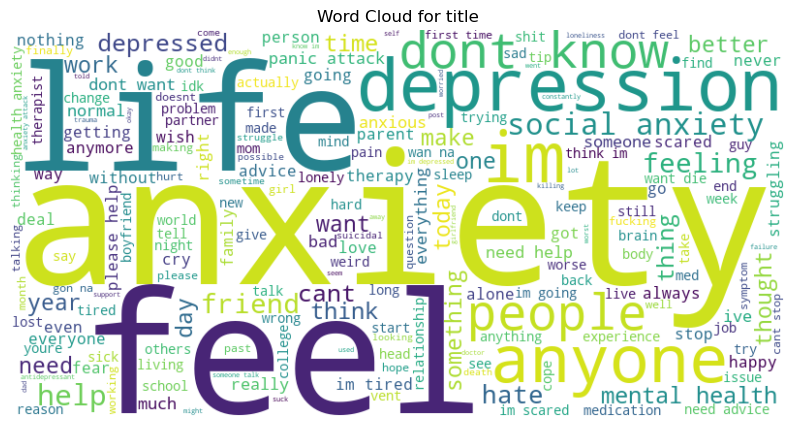

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(score_more_than_2['title_text_processed'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for title')
plt.axis('off')
plt.show()


### Ngrams for title_text_preprocessed

In [75]:
#tri-grams

In [78]:
from collections import Counter
from nltk.corpus import stopwords

def generate_N_grams(text, ngram=1):
    words = [word for word in text.split() if word not in set(stopwords.words('english'))]
    temp = zip(*[words[i:] for i in range(0, ngram)])
    ans = [' '.join(ngram) for ngram in temp]
    return ans

score_more_than_2['trigrams'] = score_more_than_2['title_text_processed'].apply(lambda x: generate_N_grams(x, ngram=3))
all_trigrams = [trigram for sublist in score_more_than_2['trigrams'] for trigram in sublist]
trigram_counts = Counter(all_trigrams)
#top 25
top_25_trigrams = trigram_counts.most_common(25)
for trigram, count in top_25_trigrams:
    print(f"{trigram}: {count}")


feel like im: 415
anyone else feel: 165
dont know anymore: 147
need someone talk: 114
im gon na: 100
anyone else get: 99
dont know im: 84
else feel like: 77
cant take anymore: 77
dont know whats: 77
dont wan na: 73
mental health issue: 67
dont feel like: 62
know whats wrong: 57
like im going: 56
wan na die: 54
feel like failure: 53
dont even know: 53
cant stop thinking: 52
feel like ive: 52
feel like life: 49
dont want live: 49
dont know feel: 48
feel like dont: 46
ever get better: 43


In [80]:
#bi-gram

In [79]:
def generate_N_grams(text, ngram=1):
    words = [word for word in text.split() if word not in set(stopwords.words('english'))]
    temp = zip(*[words[i:] for i in range(0, ngram)])
    ans = [' '.join(ngram) for ngram in temp]
    return ans

score_more_than_2['bigrams'] = score_more_than_2['title_text_processed'].apply(lambda x: generate_N_grams(x, ngram=2))
all_bigrams = [bigram for sublist in score_more_than_2['bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)
#top 25
top_25_bigrams = bigram_counts.most_common(25)
for bigram, count in top_25_bigrams:
    print(f"{bigram}: {count}")

feel like: 1998
dont know: 1526
social anxiety: 1358
anyone else: 915
mental health: 783
panic attack: 576
need help: 555
dont want: 515
like im: 485
im tired: 473
get better: 365
please help: 349
think im: 330
im scared: 315
im going: 307
wan na: 303
health anxiety: 287
need advice: 273
want die: 240
feeling like: 212
cant stop: 203
dont feel: 201
gon na: 198
first time: 194
else feel: 177


In [ ]:
##Topic Modeling 

In [125]:
#LDA

from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

tokenized_text = [word_tokenize(text.lower()) for text in score_more_than_2['title_text_processed']]
tokenized_text = [[word for word in doc if word not in stopwords.words('english')] for doc in tokenized_text]

dictionary = corpora.Dictionary(tokenized_text)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]

#LDA model
lda_model = models.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=15)
#topics = 5 
print("LDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")



LDA Topics:
Topic 0: 0.097*"anxiety" + 0.080*"social" + 0.034*"people" + 0.018*"hate" + 0.017*"job" + 0.011*"work" + 0.011*"life" + 0.010*"depression" + 0.009*"way" + 0.009*"normal"
Topic 1: 0.062*"dont" + 0.046*"help" + 0.038*"know" + 0.036*"cant" + 0.035*"want" + 0.033*"need" + 0.027*"someone" + 0.021*"talk" + 0.018*"stop" + 0.017*"advice"
Topic 2: 0.065*"feel" + 0.047*"like" + 0.032*"friend" + 0.026*"anyone" + 0.023*"get" + 0.022*"life" + 0.021*"feeling" + 0.020*"people" + 0.020*"make" + 0.019*"else"
Topic 3: 0.108*"im" + 0.022*"going" + 0.018*"year" + 0.018*"go" + 0.015*"something" + 0.014*"first" + 0.014*"alone" + 0.013*"scared" + 0.013*"school" + 0.013*"time"
Topics for document 0: [(0, 0.06250449), (1, 0.06250463), (2, 0.5624597), (3, 0.31253114)]


In [127]:
#to check the probablity of the topics for each row. 
document_index = 2
topics = lda_model.get_document_topics(corpus[document_index])
print(f"Topics for document {document_index}: {topics}")

Topics for document 2: [(0, 0.3128421), (1, 0.06252713), (2, 0.5621031), (3, 0.062527716)]


In [131]:
#assign the topics to the dataframe title column - pending 
score_more_than_2.head(3)

created_utc       id        name  score  \
2   2023-09-01 00:17:22  166rvjv  t3_166rvjv      2   
5   2023-09-01 00:23:41  166s0v2  t3_166s0v2      5   
12  2023-09-01 01:03:41  166syfu  t3_166syfu      2   

                                                title  \
2                I just had my first mental breakdown   
5   Can't even tell what's normal anymore because ...   
12                           Im terrified of adulting   

                                             selftext           author  \
2   I’ve walked this earth 31 years and have alway...      SeoulKitten   
5   Woke up feeling out of breath. Not sure if it'...    fuckerofmoths   
12  I’m so overwhelmed and anxious I’m barely slee...  Severe-Tie-4918   

        subreddit  month  day  year  \
2   anxiety_posts      9    1  2023   
5   anxiety_posts      9    1  2023   
12  anxiety_posts      9    1  2023   

                                     selftext_cleaned  \
2   ive walked this earth 31 years and have always...   
5   woke up feeling out of breath not sure if its ...   
12  im so overwhelmed and anxious im barely sleepi...   

                                        title_cleaned  \
2                i just had my first mental breakdown   
5   cant even tell whats normal anymore because of...   
12                           im terrified of adulting   

                                 title_text_processed  \
2                              first mental breakdown   
5   cant even tell whats normal anymore health anx...   
12                              im terrified adulting   

                              selftext_text_processed  \
2   ive walked earth year always emotionally stron...   
5   woke feeling breath sure heart lung problem an...   
12  im overwhelmed anxious im barely sleeping eati...   

                                             trigrams  \
2                            [first mental breakdown]   
5   [cant even tell, even tell whats, tell whats n...   
12                            [im terrified adulting]   

                                              bigrams  
2                    [first mental, mental breakdown]  
5   [cant even, even tell, tell whats, whats norma...  
12                 [im terrified, terrified adulting]

In [135]:
document_index = 5
document = score_more_than_2['title_text_processed'][document_index]  # Get the text of the document
topics = lda_model.get_document_topics(corpus[document_index])
best_topic = max(topics, key=lambda x: x[1])
print(f"Document {document_index}: {document}")
print(f"Best suited topic for document {document_index}: {best_topic}")
print(f"Topics for document {document_index}: {topics}")


Document 5: cant even tell whats normal anymore health anxiety
Best suited topic for document 5: (3, 0.7599154)
Topics for document 5: [(0, 0.03125263), (1, 0.17747067), (2, 0.031361297), (3, 0.7599154)]


In [138]:
# !pip install liwc
from liwc import LIWC

ImportError: cannot import name 'LIWC' from 'liwc' (C:\Users\sssri\anaconda3\Lib\site-packages\liwc\__init__.py)

In [139]:
!pip show liwc

Name: liwc
Version: 0.5.0
Summary: Linguistic Inquiry and Word Count (LIWC) analyzer (proprietary data not included)
Home-page: https://github.com/chbrown/liwc-python
Author: Christopher Brown
Author-email: chrisbrown@utexas.edu
License: MIT
Location: C:\Users\sssri\anaconda3\Lib\site-packages
Requires: 
Required-by: 


In [141]:
import liwc
print(dir(liwc))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'build_trie', 'dic', 'load_token_parser', 'pkg_resources', 'read_dic', 'search_trie', 'trie']


In [ ]:


# Load the LIWC dictionary (adjust path as needed)
liwc_dict = pd.read_csv("LIWC2015_English.dic")

# Initialize the LIWC object
liwc = LIWC(liwc_dict)

# Example text to analyze
text = "I'm feeling really stressed and anxious about this project. I don't know if I can handle it."

# Get LIWC category scores
scores = liwc.get_text_category_scores(text)

# Print scores
print(scores)


- Social Anxiety and Work-related Stress: This topic revolves around anxiety, social situations, work-related challenges, and feelings of hatred towards certain aspects of life or work.

- Seeking Support and Advice: Individuals express their need for help, advice, and support, indicating feelings of uncertainty, desire for assistance, and the importance of communication with others.

- Emotional Expression and Relatability: Focuses on emotions, feelings, and interpersonal dynamics, including how individuals perceive themselves, relate to others, and express their emotions.

- Personal Challenges and Growth: Addresses personal struggles, including coping with fear, uncertainty, and the challenges of life transitions such as starting a new year or facing situations alone.

1. Mental Health and Social Concerns: This group combines Topic 0 ("anxiety", "social", "depression") and parts of Topic 2 ("feel", "like", "life") that might be related to broader mental well-being. It captures expressions of anxiety, social anxieties, potential depression, and general struggles with life.

2. Help-Seeking and Uncertainty: This group combines Topic 1 ("help", "know", "need", "advice") and parts of Topic 2 ("feel", "like") that focus on seeking support and expressing uncertainty. It highlights users reaching out for help, guidance, and acknowledging their feelings of being lost or unsure.

3. Social Connection and Loneliness: This group focuses on parts of Topic 2 ("friend", "anyone", "people", "make") that emphasize desires for connection and potentially loneliness. It captures users expressing a need for friends, connection, or feeling isolated.

4. Self-Reflection and Experiences: This group consists mainly of Topic 3 ("im", "going", "year", "go", "alone", "scared", "school", "time") and potentially reflects users' self-reflection, personal experiences, or sharing stories related to time and specific situations like school. While not directly related to the previous topics, it captures a distinct aspect of the discussions.

In [82]:
score_more_than_2.head()

created_utc       id        name  score  \
2   2023-09-01 00:17:22  166rvjv  t3_166rvjv      2   
5   2023-09-01 00:23:41  166s0v2  t3_166s0v2      5   
12  2023-09-01 01:03:41  166syfu  t3_166syfu      2   
13  2023-09-01 01:07:34  166t1qu  t3_166t1qu      3   
14  2023-09-01 01:29:30  166tiye  t3_166tiye      6   

                                                title  \
2                I just had my first mental breakdown   
5   Can't even tell what's normal anymore because ...   
12                           Im terrified of adulting   
13                  Red bull and vodka anxiety attack   
14  I had to tell the girl I really like that I'm ...   

                                             selftext           author  \
2   I’ve walked this earth 31 years and have alway...      SeoulKitten   
5   Woke up feeling out of breath. Not sure if it'...    fuckerofmoths   
12  I’m so overwhelmed and anxious I’m barely slee...  Severe-Tie-4918   
13  So I'll start out by saying I realize it is st...     Catlover5566   
14  This very beautiful girl worked with me at a h...    Ronaldinho910   

        subreddit  month  day  year  \
2   anxiety_posts      9    1  2023   
5   anxiety_posts      9    1  2023   
12  anxiety_posts      9    1  2023   
13  anxiety_posts      9    1  2023   
14  anxiety_posts      9    1  2023   

                                     selftext_cleaned  \
2   ive walked this earth 31 years and have always...   
5   woke up feeling out of breath not sure if its ...   
12  im so overwhelmed and anxious im barely sleepi...   
13  so ill start out by saying i realize it is stu...   
14  this very beautiful girl worked with me at a h...   

                                        title_cleaned  \
2                i just had my first mental breakdown   
5   cant even tell whats normal anymore because of...   
12                           im terrified of adulting   
13                  red bull and vodka anxiety attack   
14  i had to tell the girl i really like that im n...   

                                 title_text_processed  \
2                              first mental breakdown   
5   cant even tell whats normal anymore health anx...   
12                              im terrified adulting   
13                      red bull vodka anxiety attack   
14        tell girl really like im ready relationship   

                              selftext_text_processed  \
2   ive walked earth year always emotionally stron...   
5   woke feeling breath sure heart lung problem an...   
12  im overwhelmed anxious im barely sleeping eati...   
13  ill start saying realize stupid mix red bull v...   
14  beautiful girl worked hotel past month really ...   

                                             trigrams  \
2                            [first mental breakdown]   
5   [cant even tell, even tell whats, tell whats n...   
12                            [im terrified adulting]   
13  [red bull vodka, bull vodka anxiety, vodka anx...   
14  [tell girl really, girl really like, really li...   

                                              bigrams  
2                    [first mental, mental breakdown]  
5   [cant even, even tell, tell whats, whats norma...  
12                 [im terrified, terrified adulting]  
13  [red bull, bull vodka, vodka anxiety, anxiety ...  
14  [tell girl, girl really, really like, like im,...

In [83]:
# score_more_than_2.to_csv('score_more_than_2.csv')

In [115]:
### Top2vec 
# ! python --version

# !pip install tensorflow==2.15.0
# !pip install numpy

# !pip install tensorflow_text==2.15.0

# !pip install top2vec
# !pip install top2vec[sentence_transformers]
# !pip install top2vec[sentence_encoders]

# from top2vec import Top2Vec

# model = Top2Vec(score_more_than_2.title_text_processed.values, embedding_model='universal-sentence-encoder')

In [117]:
# score_less_than_2

In [118]:
import warnings
warnings.filterwarnings('ignore')

#dropping number of comments column as its of no use.
score_less_than_2.drop(columns="num_comments",inplace=True)

score_less_than_2.head()


created_utc       id        name  score  \
0  2023-09-01 00:04:31  166rkdi  t3_166rkdi      1   
1  2023-09-01 00:17:08  166rvd1  t3_166rvd1      1   
3  2023-09-01 00:18:16  166rw9y  t3_166rw9y      1   
4  2023-09-01 00:19:46  166rxgk  t3_166rxgk      1   
7  2023-09-01 00:35:42  166sbdq  t3_166sbdq      1   

                                               title  \
0  Is it possible for anxiety to become so habitu...   
1                                       Cannot sleep   
3                Is a fluctuating Heart Rate normal?   
4          Can anxiety make someone starve to death?   
7     Question about Propranolol and chest tightness   

                                            selftext                author  \
0  Can the anxiety become a permanent locked stat...           Sea-Buy4667   
1  so my anxiety has been so bad for the past few...  Unfair_Effective_634   
3  My Apple Watch shows constant changing of hear...                addl99   
4  When I have really bad anxiety I can't eat. Ca...          eastsideeric   
7  I’m going to start propranolol tomorrow and I ...        heinousanus666   

       subreddit  month  day  year  
0  anxiety_posts      9    1  2023  
1  anxiety_posts      9    1  2023  
3  anxiety_posts      9    1  2023  
4  anxiety_posts      9    1  2023  
7  anxiety_posts      9    1  2023

In [119]:
### Data Cleaning

import re
import string

def clean_text(text):
    # Check if the value is NaN
    if pd.isna(text):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove text within brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('utf-8')
    
    # Remove additional parentheses
    text = re.sub(r'\(+\)', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove newline characters and extra whitespaces
    text = re.sub(r'\s+', ' ', text.replace('\n', ' ').strip())
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove hashtags (words starting with '#')
    text = re.sub(r'#\w+', '', text)
    
    # Remove mentions (words starting with '@')
    text = re.sub(r'@\w+', '', text)
    
    return text


# Apply the clean_text function to the 'selftext' column
score_less_than_2['selftext_cleaned'] = score_less_than_2['selftext'].apply(clean_text)
score_less_than_2['title_cleaned'] = score_less_than_2['title'].apply(clean_text)

score_less_than_2.sample(8)



created_utc       id        name  score  \
50730   2023-09-20 19:03:38  16nti5v  t3_16nti5v      1   
108249  2024-02-12 09:40:35  1aowb0z  t3_1aowb0z      1   
125708  2023-11-23 00:11:34  181nzc6  t3_181nzc6      1   
106518  2024-02-07 14:50:03  1al4n8i  t3_1al4n8i      1   
108174  2024-02-12 03:35:46  1aoqi4u  t3_1aoqi4u      1   
30554   2023-10-12 15:44:28  176a1aw  t3_176a1aw      1   
77163   2023-11-10 08:10:12  17rzek9  t3_17rzek9      1   
1380    2023-09-09 23:15:40  16ek0y2  t3_16ek0y2      1   

                                                    title  \
50730   Struggling with my own identity and feeling tr...   
108249  The Role of Physical Activity in Maintaining M...   
125708                                       Mentally ill   
106518                            Unsure what to think...   
108174                               Why do I feel alone?   
30554   Anyone else break out in rashes (kinda like bu...   
77163                       Any tips to keeping it all in   
1380        Getting a new roommate while having a pet dog   

                                                 selftext             author  \
50730   The thing is I don’t know who I am, I don't kn...         geekysocks   
108249  [Physical activity](https://nextezi.pro/the-ro...            nextezi   
125708  Why when someone is really rude to me or says ...       delltedddd77   
106518  \nposted in r/psychosis too \n\nHas anyone els...      AdWorried3416   
108174  I'm young, still have my life ahead of me. I h...        Josthefang5   
30554   Just curious if this is a possible symptom of ...  Western-Sell-8959   
77163   Idk man, most of the time i can pretend everyt...           immasaur   
1380    Hi all! I’m currently in grad school and have ...    Ok_Welcome_7845   

                  subreddit  month  day  year  \
50730      depression_posts      9   20  2023   
108249  mental_health_posts      2   12  2024   
125708  mental_health_posts     11   23  2023   
106518  mental_health_posts      2    7  2024   
108174  mental_health_posts      2   12  2024   
30554         anxiety_posts     10   12  2023   
77163      depression_posts     11   10  2023   
1380          anxiety_posts      9    9  2023   

                                         selftext_cleaned  \
50730   the thing is i dont know who i am i dont know ...   
108249   is not only essential for maintaining physica...   
125708  why when someone is really rude to me or says ...   
106518  posted in rpsychosis too has anyone else been ...   
108174  im young still have my life ahead of me i have...   
30554   just curious if this is a possible symptom of ...   
77163   idk man most of the time i can pretend everyth...   
1380    hi all im currently in grad school and have be...   

                                            title_cleaned  
50730   struggling with my own identity and feeling tr...  
108249  the role of physical activity in maintaining m...  
125708                                       mentally ill  
106518                               unsure what to think  
108174                                why do i feel alone  
30554   anyone else break out in rashes kinda like bum...  
77163                       any tips to keeping it all in  
1380        getting a new roommate while having a pet dog

In [120]:
### Text pre processing

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [token.lower() for token in tokens if token.isalpha()]
    
    # Removing stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Joining tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


# Apply text preprocessing to posts DataFrame
score_less_than_2['title_text_processed'] = score_less_than_2['title_cleaned'].apply(preprocess_text)
score_less_than_2['selftext_text_processed'] = score_less_than_2['selftext_cleaned'].apply(preprocess_text)

score_less_than_2.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sssri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sssri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sssri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


created_utc       id        name  score  \
0  2023-09-01 00:04:31  166rkdi  t3_166rkdi      1   
1  2023-09-01 00:17:08  166rvd1  t3_166rvd1      1   
3  2023-09-01 00:18:16  166rw9y  t3_166rw9y      1   
4  2023-09-01 00:19:46  166rxgk  t3_166rxgk      1   
7  2023-09-01 00:35:42  166sbdq  t3_166sbdq      1   

                                               title  \
0  Is it possible for anxiety to become so habitu...   
1                                       Cannot sleep   
3                Is a fluctuating Heart Rate normal?   
4          Can anxiety make someone starve to death?   
7     Question about Propranolol and chest tightness   

                                            selftext                author  \
0  Can the anxiety become a permanent locked stat...           Sea-Buy4667   
1  so my anxiety has been so bad for the past few...  Unfair_Effective_634   
3  My Apple Watch shows constant changing of hear...                addl99   
4  When I have really bad anxiety I can't eat. Ca...          eastsideeric   
7  I’m going to start propranolol tomorrow and I ...        heinousanus666   

       subreddit  month  day  year  \
0  anxiety_posts      9    1  2023   
1  anxiety_posts      9    1  2023   
3  anxiety_posts      9    1  2023   
4  anxiety_posts      9    1  2023   
7  anxiety_posts      9    1  2023   

                                    selftext_cleaned  \
0  can the anxiety become a permanent locked stat...   
1  so my anxiety has been so bad for the past few...   
3  my apple watch shows constant changing of hear...   
4  when i have really bad anxiety i cant eat can ...   
7  im going to start propranolol tomorrow and i w...   

                                       title_cleaned  \
0  is it possible for anxiety to become so habitu...   
1                                       cannot sleep   
3                 is a fluctuating heart rate normal   
4           can anxiety make someone starve to death   
7     question about propranolol and chest tightness   

                                title_text_processed  \
0  possible anxiety become habitual even dont str...   
1                                              sleep   
3                      fluctuating heart rate normal   
4                  anxiety make someone starve death   
7               question propranolol chest tightness   

                             selftext_text_processed  
0  anxiety become permanent locked state say urin...  
1  anxiety bad past day literally almost hour str...  
3  apple watch show constant changing heart rate ...  
4  really bad anxiety cant eat anxiety make someo...  
7  im going start propranolol tomorrow wondering ...

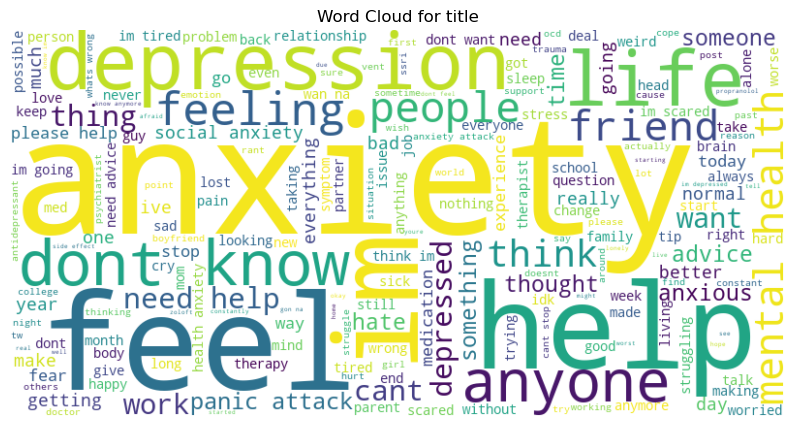

In [121]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Concatenate the text from all rows into a single string
text = ' '.join(score_less_than_2['title_text_processed'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for title')
plt.axis('off')
plt.show()


In [122]:
#3grams
from collections import Counter
from nltk.corpus import stopwords

def generate_N_grams(text, ngram=1):
    words = [word for word in text.split() if word not in set(stopwords.words('english'))]
    temp = zip(*[words[i:] for i in range(0, ngram)])
    ans = [' '.join(ngram) for ngram in temp]
    return ans


score_less_than_2['trigrams'] = score_less_than_2['title_text_processed'].apply(lambda x: generate_N_grams(x, ngram=3))
all_trigrams = [trigram for sublist in score_less_than_2['trigrams'] for trigram in sublist]
trigram_counts = Counter(all_trigrams)

#top 25 3-grams
top_25_trigrams = trigram_counts.most_common(25)
for trigram, count in top_25_trigrams:
    print(f"{trigram}: {count}")


feel like im: 333
dont know anymore: 134
anyone else feel: 93
need someone talk: 87
dont know im: 81
dont know whats: 81
anyone else get: 80
im gon na: 69
like im going: 62
mental health issue: 59
know whats wrong: 55
dont even know: 47
dont feel like: 45
else feel like: 44
feel like life: 43
im going crazy: 42
feel like cant: 41
dont know feel: 40
dont wan na: 40
dont want anymore: 37
cant take anymore: 35
anyone else experience: 35
cant stop thinking: 35
feel like ive: 34
im going kill: 34


In [123]:
# 4 grams

def generate_N_grams(text, ngram=1):
    words = [word for word in text.split() if word not in set(stopwords.words('english'))]
    temp = zip(*[words[i:] for i in range(0, ngram)])
    ans = [' '.join(ngram) for ngram in temp]
    return ans

score_less_than_2['fourgrams'] = score_less_than_2['title_text_processed'].apply(lambda x: generate_N_grams(x, ngram=4))
all_fourgrams = [fourgram for sublist in score_less_than_2['fourgrams'] for fourgram in sublist]
fourgram_counts = Counter(all_fourgrams)

#4-grams
top_25_fourgrams = fourgram_counts.most_common(25)
for fourgram, count in top_25_fourgrams:
    print(f"{fourgram}: {count}")


feel like im going: 60
dont know whats wrong: 51
anyone else feel like: 40
like im going crazy: 27
feel like im losing: 23
myseif soon tonight l: 20
soon tonight l cant: 20
tonight l cant continue: 20
im going kill self: 19
l cant continue anymore: 19
dont know whats happening: 17
going kill self tonight: 16
need help dont know: 13
like im going insane: 12
dont want live anymore: 12
kiliing myseif soon tonight: 12
insane insane insane insane: 12
feel like im wasting: 11
anyone else feel way: 11
dont know much longer: 11
tonight cant continue longer: 11
feel like im stuck: 10
dont know whats going: 10
dont think ill ever: 10
dont know keep going: 10


In [ ]:
#topic modeling 

In [126]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

tokenized_text = [word_tokenize(text.lower()) for text in score_less_than_2['title_text_processed']]
tokenized_text = [[word for word in doc if word not in stopwords.words('english')] for doc in tokenized_text]

dictionary = corpora.Dictionary(tokenized_text)

dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]

#LDA model
lda_model = models.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=15)
print("LDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# document_index = 0
# topics = lda_model.get_document_topics(corpus[document_index])
# print(f"Topics for document {document_index}: {topics}")


LDA Topics:
Topic 0: 0.017*"job" + 0.016*"depressed" + 0.016*"new" + 0.016*"think" + 0.013*"make" + 0.013*"normal" + 0.011*"people" + 0.011*"go" + 0.009*"getting" + 0.009*"guy"
Topic 1: 0.072*"im" + 0.058*"feel" + 0.040*"like" + 0.024*"feeling" + 0.018*"going" + 0.013*"life" + 0.012*"year" + 0.011*"wrong" + 0.011*"time" + 0.011*"ive"
Topic 2: 0.081*"anxiety" + 0.052*"social" + 0.037*"mental" + 0.027*"health" + 0.022*"depression" + 0.017*"work" + 0.013*"therapy" + 0.011*"relationship" + 0.010*"school" + 0.009*"friend"
Topic 3: 0.059*"help" + 0.053*"dont" + 0.040*"need" + 0.038*"know" + 0.030*"want" + 0.030*"cant" + 0.026*"advice" + 0.022*"anyone" + 0.022*"someone" + 0.017*"friend"
